In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import copy

In [ ]:
url = 'https://raw.githubusercontent.com/hadarlevin/hadarlev/Project---ML/babies.csv'
data = pd.read_csv(url)
print(data)

      case  bwt  gestation  parity   age  height  weight  smoke
0        1  120      284.0       0  27.0    62.0   100.0    0.0
1        2  113      282.0       0  33.0    64.0   135.0    0.0
2        3  128      279.0       0  28.0    64.0   115.0    1.0
3        4  123        NaN       0  36.0    69.0   190.0    0.0
4        5  108      282.0       0  23.0    67.0   125.0    1.0
...    ...  ...        ...     ...   ...     ...     ...    ...
1231  1232  113      275.0       1  27.0    60.0   100.0    0.0
1232  1233  128      265.0       0  24.0    67.0   120.0    0.0
1233  1234  130      291.0       0  30.0    65.0   150.0    1.0
1234  1235  125      281.0       1  21.0    65.0   110.0    0.0
1235  1236  117      297.0       0  38.0    65.0   129.0    0.0

[1236 rows x 8 columns]


In [ ]:
data = data.dropna()

data.bwt = data.bwt*0.028349523 #convert ounces to kg
bwt = data.bwt
data.height = data.height*0.0254 #convert inches to meter
height = data.height
data.weight = data.weight*0.45359237
weight = data.weight
gest = data.gestation
first = data.parity
smoke = data.smoke

print(data)

      case       bwt  gestation  parity   age  height     weight  smoke
0        1  3.401943      284.0       0  27.0  1.5748  45.359237    0.0
1        2  3.203496      282.0       0  33.0  1.6256  61.234970    0.0
2        3  3.628739      279.0       0  28.0  1.6256  52.163123    1.0
4        5  3.061748      282.0       0  23.0  1.7018  56.699046    1.0
5        6  3.855535      286.0       0  25.0  1.5748  42.184090    0.0
...    ...       ...        ...     ...   ...     ...        ...    ...
1231  1232  3.203496      275.0       1  27.0  1.5240  45.359237    0.0
1232  1233  3.628739      265.0       0  24.0  1.7018  54.431084    0.0
1233  1234  3.685438      291.0       0  30.0  1.6510  68.038855    1.0
1234  1235  3.543690      281.0       1  21.0  1.6510  49.895161    0.0
1235  1236  3.316894      297.0       0  38.0  1.6510  58.513416    0.0

[1174 rows x 8 columns]


<ipython-input-8-b220818f4e14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.bwt = data.bwt*0.028349523 #convert ounces to kg
<ipython-input-8-b220818f4e14>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.height = data.height*0.0254 #convert inches to meter
<ipython-input-8-b220818f4e14>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

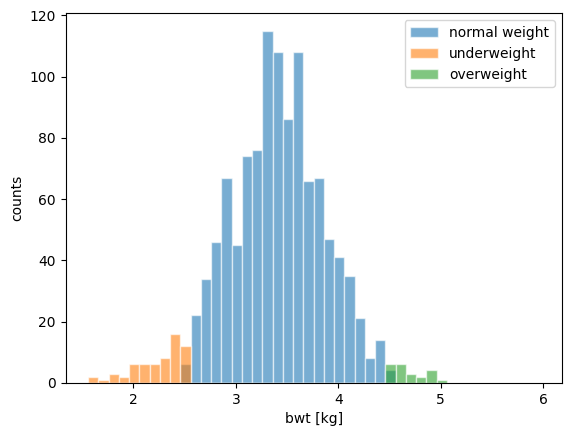

p-value t test = 0.0
p-value bootstrap = 0.0


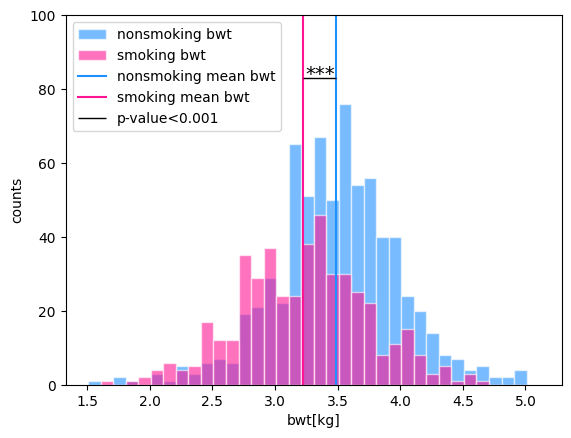

In [ ]:
class_weight = np.zeros(len(bwt))

# Assign class weights based on bwt values
class_weight[(bwt >= 2.5) & (bwt <= 4.5)] = 2
class_weight[bwt < 2.5] = 1
class_weight[bwt > 4.5] = 3

# Convert class_weight to integer array
class_weight = class_weight.astype(int)

# Create gr1, gr2, and gr3 based on class_weight
gr1 = data[class_weight == 1]
gr2 = data[class_weight == 2]
gr3 = data[class_weight == 3]

bin_edges = np.arange(min(bwt), max(bwt)+1, 0.1)
plt.hist(bwt[class_weight==2], bins = bin_edges, alpha = 0.6, label = 'normal weight', edgecolor = 'white')
plt.hist(bwt[class_weight==1], bins = bin_edges, alpha = 0.6, label = 'underweight',edgecolor = 'white')
plt.hist(bwt[class_weight==3], bins = bin_edges, alpha = 0.6, label = 'overweight',edgecolor = 'white')
plt.xlabel('bwt [kg]'), plt.ylabel('counts')
#plt.title('Birthweight classes')
plt.legend(loc = 'upper right')
plt.show()

data_withot_bwt = data.drop(['bwt', 'case', 'parity','age'], axis=1)

# Calculate the desired number of samples for balanced classes
desiredNumSamples = 100

# Perform random undersampling for the majority class (gr2)
undersampled_gr2_indices = np.random.choice(gr2.index, size=desiredNumSamples, replace=False)

# Perform random oversampling for the minority classes (gr1 and gr3)
oversampled_gr1_indices = np.random.choice(gr1.index, size=desiredNumSamples, replace=True)
oversampled_gr3_indices = np.random.choice(gr3.index, size=desiredNumSamples, replace=True)

# Create the balanced dataset
balanced_gr1 = gr1.loc[oversampled_gr1_indices]
balanced_gr2 = gr2.loc[undersampled_gr2_indices]
balanced_gr3 = gr3.loc[oversampled_gr3_indices]


# Combine the balanced datasets into a single DataFrame
balanced_data = pd.concat([balanced_gr1, balanced_gr2, balanced_gr3])

# p value for smoke

smoking_bwt = bwt[smoke ==1];
nonsmoking_bwt = bwt[smoke ==0];
N1 = len(smoking_bwt)
N2 = len(nonsmoking_bwt)
std_smoking = np.std(smoking_bwt,ddof=1)
std_nonsmoking = np.std(nonsmoking_bwt,ddof=1)


# p value unpaird (using t distribution)
se_comb = np.sqrt(((std_smoking)**2 / N1 ) + ((std_nonsmoking)**2 / N2 ) )
t_stat = (np.mean(nonsmoking_bwt) - np.mean(smoking_bwt)) / se_comb
p_val_unpaired = 1 - stats.t.cdf(abs(t_stat),N1+N2-2)
print('p-value t test = {}'.format(round(p_val_unpaired,4)))


# parametric bootsrap unpaired
# for normal distribution
num_boot = 2000;
mean_smoking= np.mean(smoking_bwt)
mean_nonsmoking = np.mean(nonsmoking_bwt)
parametric_unpaired_boot1 = np.random.normal(mean_smoking, std_smoking, size = (N1,num_boot))
parametric_unpaired_boot2 = np.random.normal(mean_nonsmoking, std_nonsmoking, size = (N2,num_boot))
parametric_unpaired_boot1_mean = np.mean(parametric_unpaired_boot1, axis=0)
parametric_unpaired_boot2_mean = np.mean(parametric_unpaired_boot2, axis=0)
parametric_unpaired_boot_mean = parametric_unpaired_boot2_mean - parametric_unpaired_boot1_mean
# plt.hist(parametric_unpaired_boot_mean, label = 'parametric bootstrap unpaired',edgecolor = 'white')
# plt.ylabel('count')
# plt.xlabel('mean differences distribution')
# plt.title('parametric bootstrap unpaired mean differences distribution')
# plt.show()

p_val = sum(parametric_unpaired_boot_mean<=0)/num_boot
print('p-value bootstrap = {}'.format(round(p_val,8)))

bin_width = 0.1
bin_edges = np.arange(min(bwt), max(bwt) + bin_width, bin_width)

# Calculate the bin centers for each group
bin_centers = bin_edges + bin_width / 2

# Shift the bin edges slightly for each group
bin_edges_1 = bin_edges - bin_width / 2
bin_edges_2 = bin_edges + bin_width / 2

mean_nonsmoke = np.mean(bwt[smoke == 0])
mean_smoke = np.mean(bwt[smoke == 1])

# Plot the histograms
plt.hist(bwt[smoke == 0], bins=bin_edges_1, alpha=0.6, color='dodgerblue', edgecolor='white', label='nonsmoking bwt')
plt.hist(bwt[smoke == 1], bins=bin_edges_2, alpha=0.6, color='deeppink', edgecolor='white', label='smoking bwt')

plt.axvline(mean_nonsmoke, color='dodgerblue', linewidth=1.5, label = 'nonsmoking mean bwt')
plt.axvline(mean_smoke, color='deeppink', linewidth=1.5,label = 'smoking mean bwt')

# Draw a horizontal line with '*'
plt.hlines(83, mean_smoke, mean_nonsmoke, color='black', linewidth=1, label = 'p-value<0.001')
plt.text(np.mean([mean_smoke, mean_nonsmoke]), 84, '***', color='black', fontsize=14, ha='center', va='center')

plt.ylim([0, 100])
plt.xlabel('bwt[kg]')
plt.ylabel('counts')
#plt.title('Birthweight for smoking and nonsmoking mothers')
plt.legend()
plt.show()


In [ ]:
# divide to training validation and test data

# Separate the features and target variable
X = balanced_data.drop(columns=['bwt','case'])
y = balanced_data['bwt']
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Add a constant term to the feature matrix
X_train_with_ones = sm.add_constant(X_train)

# Fit the model to the training data
model_1 = sm.OLS(y_train, X_train_with_ones)
results = model_1.fit()

# Print the summary statistics
print(results.summary())

X_train, X_test, X_val = X_train.drop(columns=['parity','age','gestation']), X_test.drop(columns=['parity','age','gestation']), X_val.drop(columns=['parity','age','gestation'])

model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

# Calculate the Mean Squared Error (MSE) on the validation set
r2_score_value = r2_score(y_val, y_val_pred)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print("R-squared score for validation data:", round(r2_score_value,4))
print("rmse for validation data:", round(rmse,4))

# Predict the target values on the test set
y_test_pred = model.predict(X_test)
y_test_pred_linear_regression = y_test_pred.copy()

# Calculate the R^2 and RMSE on the test set
r2_score_value = r2_score(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("R-squared score for data test:", round(r2_score_value,4))
print("rmse for data test:", round(rmse,4))




                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     54.87
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.56e-38
Time:                        16:37:15   Log-Likelihood:                -184.57
No. Observations:                 192   AIC:                             383.1
Df Residuals:                     185   BIC:                             406.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4920      1.434     -7.314      0.0

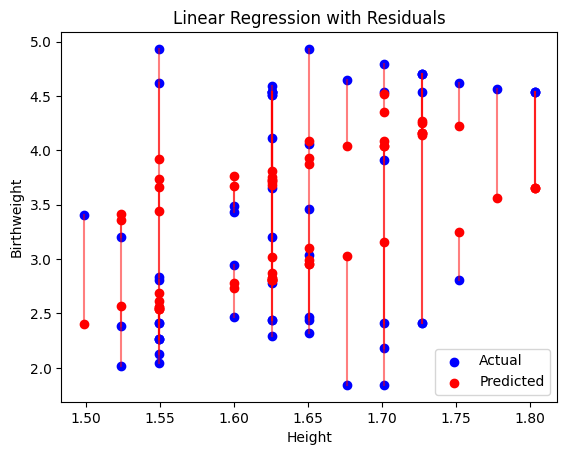

In [ ]:
import matplotlib.pyplot as plt
from itertools import islice
# Select the "height" feature from the validation data
x = X_test["height"]

# Calculate residuals
residuals = y_test - y_test_pred
y_test_temp = y_test.copy()

# Plotting the linear regression line, residuals, and connecting line
plt.scatter(x, y_test, color='b', label='Actual')
plt.scatter(x, y_test_pred, color='r', label='Predicted')
n_lines = len(x)  # Number of lines to plot
for x_test_temp, y_test_temp, res in islice(zip(x, y_test_pred, residuals), n_lines):
    plt.plot([x_test_temp, x_test_temp], [y_test_temp, y_test_temp + res], 'r-', alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Birthweight')
plt.title('Linear Regression with Residuals')
plt.legend()
plt.show()

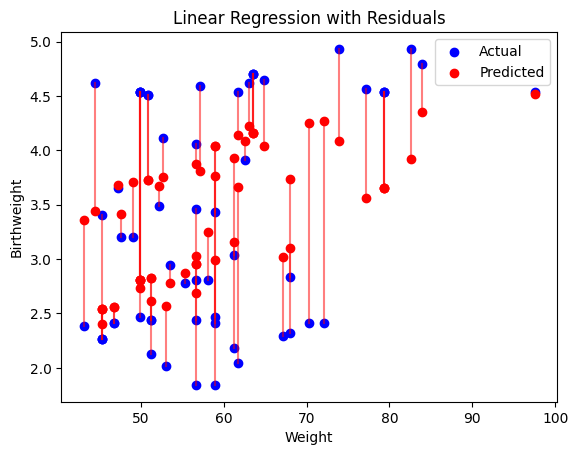

In [ ]:
# Select the "weight" feature from the validation data
x = X_test["weight"]

# Calculate residuals
residuals = y_test - y_test_pred
y_test_temp = y_test.copy()
x_test_temp = X_test

# Plotting the linear regression line, residuals, and connecting line
plt.scatter(x, y_test, color='b', label='Actual')
plt.scatter(x, y_test_pred, color='r', label='Predicted')
n_lines = len(x)  # Number of lines to plot
for x_test_temp, y_test_temp, res in islice(zip(x, y_test_pred, residuals), n_lines):
    plt.plot([x_test_temp, x_test_temp], [y_test_temp, y_test_temp + res], 'r-', alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('Birthweight')
plt.title('Linear Regression with Residuals')
plt.legend()
plt.show()

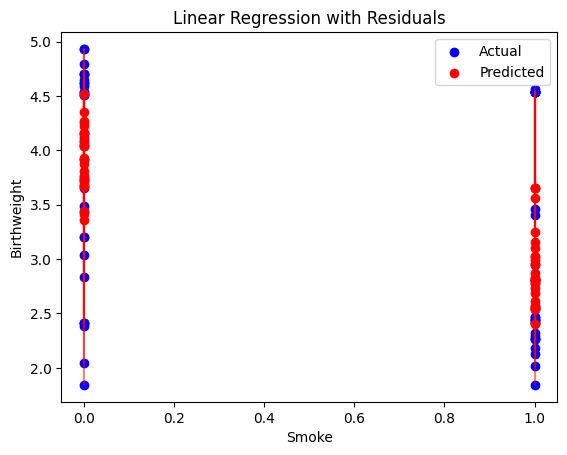

In [ ]:
# Select the "smoke" feature from the validation data
x = X_test["smoke"]

# Calculate residuals
residuals = y_test - y_test_pred
y_test_temp = y_test.copy()
x_test_temp = X_test

# Plotting the linear regression line, residuals, and connecting line
plt.scatter(x, y_test, color='b', label='Actual')
plt.scatter(x, y_test_pred, color='r', label='Predicted')
n_lines = len(x)  # Number of lines to plot
for x_test_temp, y_test_temp, res in islice(zip(x, y_test_pred, residuals), n_lines):
    plt.plot([x_test_temp, x_test_temp], [y_test_temp, y_test_temp + res], 'r-', alpha=0.5)
plt.xlabel('Smoke')
plt.ylabel('Birthweight')
plt.title('Linear Regression with Residuals')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create an instance of the DecisionTreeRegressor
model_tree = DecisionTreeRegressor()

# Fit the model to the training data
model_tree.fit(X_train, y_train)
depth = model_tree.get_depth()
print("depth :", depth)

# Predict on the validation data
y_val_pred = model_tree.predict(X_val)

# Evaluate the model on the validation data
r2_score_value = r2_score(y_val, y_val_pred)
print("R-squared score for validation data:", round(r2_score_value,4))

val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print("Validation RMSE:", round(val_rmse,4))

# data test
# Predict on the validation data
y_test_pred = model_tree.predict(X_test)
y_test_pred_tree = y_test_pred.copy()

# Evaluate the model on the validation data
r2_score_value = r2_score(y_test, y_test_pred)
print("R-squared score for data test:", round(r2_score_value,4))

test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("test RMSE:", round(test_rmse,4))



depth : 13
R-squared score for validation data: 0.4132
Validation RMSE: 0.8075
R-squared score for data test: 0.2976
test RMSE: 0.8698


In [ ]:
# comparison between linear regression and decision tree
# Calculate the errors for each model
error_linear = y_test - y_test_pred_linear_regression
error_tree = y_test - y_test_pred_tree

# Perform the paired t-test
t_statistic, p_value_ttest = stats.ttest_rel(error_linear, error_tree)

print("t test between linear regression and decision tree p-value:", round(p_value_ttest,4))

t test between linear regression and decision tree p-value: 0.1071


In [ ]:
# categorical classification

data_categorical = balanced_data.copy()

class_weight = np.zeros(len(data_categorical.bwt))

# Assign class weights based on bwt values
class_weight[(data_categorical.bwt >= 2.5) & (data_categorical.bwt <= 4.5)] = 2
class_weight[data_categorical.bwt < 2.5] = 1
class_weight[data_categorical.bwt > 4.5] = 3
data_categorical.bwt = class_weight


In [ ]:
y_train_categorical = y_train.copy()
y_train_categorical[y_train_categorical < 2.5] = 1
y_train_categorical[(y_train_categorical >= 2.5) & (y_train_categorical <= 4.5)] = 2
y_train_categorical[y_train_categorical> 4.5] = 3

y_val_categorical = y_val.copy()
y_val_categorical[y_val_categorical < 2.5] = 1
y_val_categorical[(y_val_categorical >= 2.5) & (y_val_categorical <= 4.5)] = 2
y_val_categorical[y_val_categorical> 4.5] = 3

y_test_categorical = y_test.copy()
y_test_categorical[y_test_categorical < 2.5] = 1
y_test_categorical[(y_test_categorical >= 2.5) & (y_test_categorical <= 4.5)] = 2
y_test_categorical[y_test_categorical> 4.5] = 3



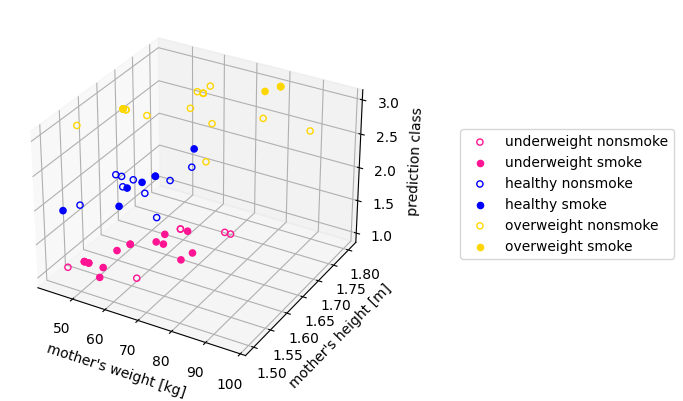

In [ ]:
#display test classification
temp = X_test.assign(predictions=y_test_categorical)
nonsmoke_data = X_test[X_test['smoke'] == 0].reset_index(drop=True)
smoke_data = X_test[X_test['smoke'] == 1].reset_index(drop=True)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for underweight cluster (Cluster 1) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 1)], temp.height[(temp.smoke == 0) & (temp.predictions == 1)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 1)], label='underweight nonsmoke', marker='o', facecolors='none', edgecolors='deeppink',alpha = 1)

# Scatter plot for underweight cluster (Cluster 1) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 1)], temp.height[(temp.smoke == 1) & (temp.predictions == 1)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 1)], c='deeppink', label='underweight smoke', marker='o', alpha = 1)

# Scatter plot for healthy weight cluster (Cluster 2) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 2)], temp.height[(temp.smoke == 0) & (temp.predictions == 2)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 2)], label='healthy nonsmoke', marker='o', facecolors='none', edgecolors='blue',alpha = 1)

# Scatter plot for healthy weight cluster (Cluster 2) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 2)], temp.height[(temp.smoke == 1) & (temp.predictions == 2)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 2)], c='blue', label='healthy smoke', marker='o',alpha = 1)

# Scatter plot for overweight cluster (Cluster 3) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 3)], temp.height[(temp.smoke == 0) & (temp.predictions == 3)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 3)], label='overweight nonsmoke', marker='o', facecolors='none', edgecolors='gold',alpha = 1)

# Scatter plot for overweight cluster (Cluster 3) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 3)], temp.height[(temp.smoke == 1) & (temp.predictions == 3)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 3)], c='gold', label='overweight smoke', marker='o',alpha = 1)

# Set axis labels and title
ax.set_xlabel("mother's weight [kg]")
ax.set_ylabel("mother's height [m]")
ax.set_zlabel('prediction class')
#ax.set_title('Weight Class True Labels')

ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

Accuracy validation: 0.6667
Accuracy test: 0.7667
Sensitivity KNN: 0.8636


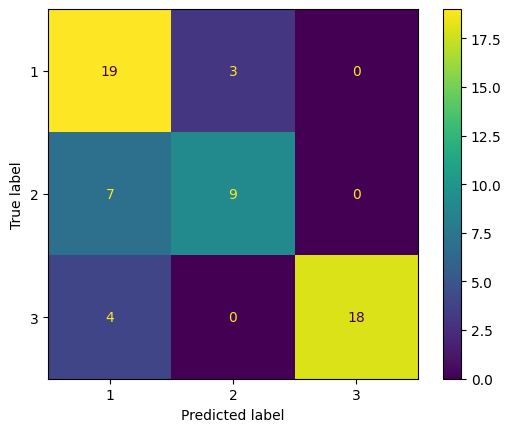

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=2)

# Fit the model to the training data
knn_model.fit(X_train, y_train_categorical)

# Make predictions on the val set
y_pred_val_categorical = knn_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val_categorical, y_pred_val_categorical)
print("Accuracy validation:", round(accuracy,4))

# Make predictions on the test set
y_pred_test_categorical = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_categorical, y_pred_test_categorical)
print("Accuracy test:", round(accuracy,4))

conf_matrix = confusion_matrix(y_test_categorical, y_pred_test_categorical)


from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [1, 2,3])
sensitivity_KNN = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1] + conf_matrix[0,2])
print("Sensitivity KNN:", round(sensitivity_KNN,4))
cm_display.plot()
plt.show()

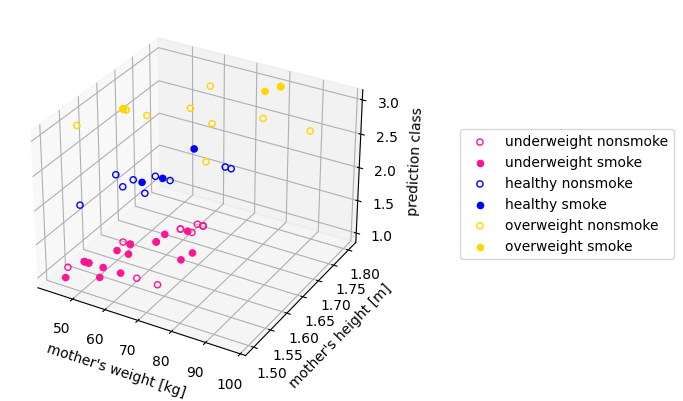

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

temp = X_test.assign(predictions=y_pred_test_categorical)
nonsmoke_data = X_test[X_test['smoke'] == 0].reset_index(drop=True)
smoke_data = X_test[X_test['smoke'] == 1].reset_index(drop=True)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for underweight cluster (Cluster 1) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 1)], temp.height[(temp.smoke == 0) & (temp.predictions == 1)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 1)], label='underweight nonsmoke', marker='o', facecolors='none', edgecolors='deeppink',alpha = 1)

# Scatter plot for underweight cluster (Cluster 1) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 1)], temp.height[(temp.smoke == 1) & (temp.predictions == 1)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 1)], c='deeppink', label='underweight smoke', marker='o', alpha = 1)

# Scatter plot for healthy weight cluster (Cluster 2) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 2)], temp.height[(temp.smoke == 0) & (temp.predictions == 2)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 2)], label='healthy nonsmoke', marker='o', facecolors='none', edgecolors='blue',alpha = 1)

# Scatter plot for healthy weight cluster (Cluster 2) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 2)], temp.height[(temp.smoke == 1) & (temp.predictions == 2)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 2)], c='blue', label='healthy smoke', marker='o',alpha = 1)

# Scatter plot for overweight cluster (Cluster 3) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 3)], temp.height[(temp.smoke == 0) & (temp.predictions == 3)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 3)], label='overweight nonsmoke', marker='o', facecolors='none', edgecolors='gold',alpha = 1)

# Scatter plot for overweight cluster (Cluster 3) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 3)], temp.height[(temp.smoke == 1) & (temp.predictions == 3)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 3)], c='gold', label='overweight smoke', marker='o',alpha = 1)

# Set axis labels and title
ax.set_xlabel("mother's weight [kg]")
ax.set_ylabel("mother's height [m]")
ax.set_zlabel('prediction class')
#ax.set_title('Weight Class Prediction by KNN')

ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()



In [ ]:
#cubic svm
from sklearn.svm import SVC

# Create the cubic SVM model
svm_model = SVC(kernel='poly', degree=3)

# Fit the model to the training data
svm_model.fit(X_train, y_train_categorical)

# Make predictions on the validation set
y_val_pred = svm_model.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val_categorical, y_val_pred)
print("Validation Accuracy for Cubic SVM:", round(val_accuracy,4))

# Make predictions on the test set
y_test_pred = svm_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test_categorical, y_test_pred)
print("Test Accuracy for Cubic SVM:", round(test_accuracy,4))



Validation Accuracy for Cubic SVM: 0.3542
Test Accuracy for Cubic SVM: 0.45


Sensitivity SVC: 0.7273


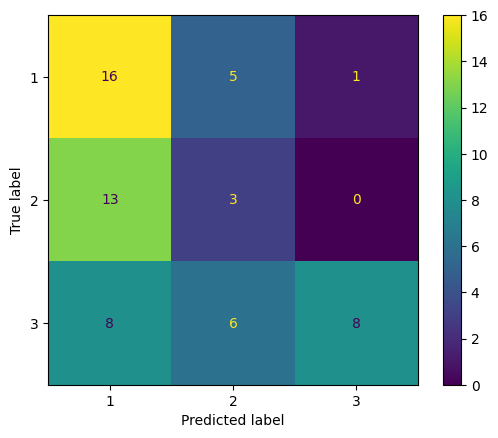

In [ ]:

conf_matrix = confusion_matrix(y_test_categorical, y_test_pred)


from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [1, 2,3])
sensitivity_SVC = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1] + conf_matrix[0,2])
print("Sensitivity SVC:", round(sensitivity_SVC,4))
cm_display.plot()
plt.show()



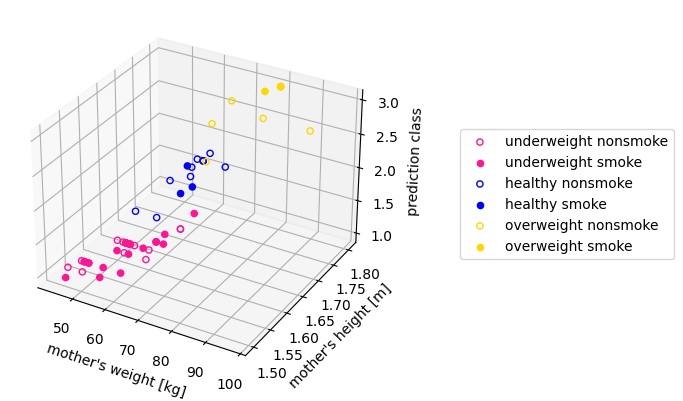

In [ ]:
# display prediction of SVM
temp = X_test.assign(predictions=y_test_pred)
nonsmoke_data = X_test[X_test['smoke'] == 0].reset_index(drop=True)
smoke_data = X_test[X_test['smoke'] == 1].reset_index(drop=True)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for underweight cluster (Cluster 1) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 1)], temp.height[(temp.smoke == 0) & (temp.predictions == 1)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 1)], label='underweight nonsmoke', marker='o', facecolors='none', edgecolors='deeppink',alpha = 1)

# Scatter plot for underweight cluster (Cluster 1) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 1)], temp.height[(temp.smoke == 1) & (temp.predictions == 1)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 1)], c='deeppink', label='underweight smoke', marker='o', alpha = 1)

# Scatter plot for healthy weight cluster (Cluster 2) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 2)], temp.height[(temp.smoke == 0) & (temp.predictions == 2)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 2)], label='healthy nonsmoke', marker='o', facecolors='none', edgecolors='blue',alpha = 1)

# Scatter plot for healthy weight cluster (Cluster 2) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 2)], temp.height[(temp.smoke == 1) & (temp.predictions == 2)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 2)], c='blue', label='healthy smoke', marker='o',alpha = 1)

# Scatter plot for overweight cluster (Cluster 3) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 3)], temp.height[(temp.smoke == 0) & (temp.predictions == 3)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 3)], label='overweight nonsmoke', marker='o', facecolors='none', edgecolors='gold',alpha = 1)

# Scatter plot for overweight cluster (Cluster 3) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 3)], temp.height[(temp.smoke == 1) & (temp.predictions == 3)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 3)], c='gold', label='overweight smoke', marker='o',alpha = 1)

# Set axis labels and title
ax.set_xlabel("mother's weight [kg]")
ax.set_ylabel("mother's height [m]")
ax.set_zlabel('prediction class')
#ax.set_title('Weight Class Prediction by Cubic SVM')

ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score

# Create a KMeans instance with three clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X_train)

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_
cluster_assignments = cluster_assignments + 1

# Get the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Get the cluster labels for each data point in validation and test sets
cluster_labels_val = kmeans.predict(X_val)
cluster_labels_val = cluster_labels_val +1

# Calculate accuracy
accuracy = accuracy_score(y_val_categorical, cluster_labels_val)
print("Accuracy test (validation):", round(accuracy,4))
# Evaluation metrics for clustering (validation)
silhouette_val = silhouette_score(X_val, cluster_labels_val)
print("Silhouette Score on Validation Data:", round(silhouette_val,4))

cluster_labels_test = kmeans.predict(X_test)
cluster_labels_test = cluster_labels_test + 1

# Calculate accuracy
accuracy = accuracy_score(y_test_categorical, cluster_labels_test)
print("Accuracy test (test):", round(accuracy,4))
# Evaluation metrics for clustering (test)
inertia_test = kmeans.inertia_
silhouette_test = silhouette_score(X_test, cluster_labels_test)

print("Inertia on Test Data:", round(inertia_test,4))
print("Silhouette Score on Test Data:", round(silhouette_test,4))

Accuracy test (validation): 0.3333
Silhouette Score on Validation Data: 0.5649
Accuracy test (test): 0.3333
Inertia on Test Data: 4587.6238
Silhouette Score on Test Data: 0.5438


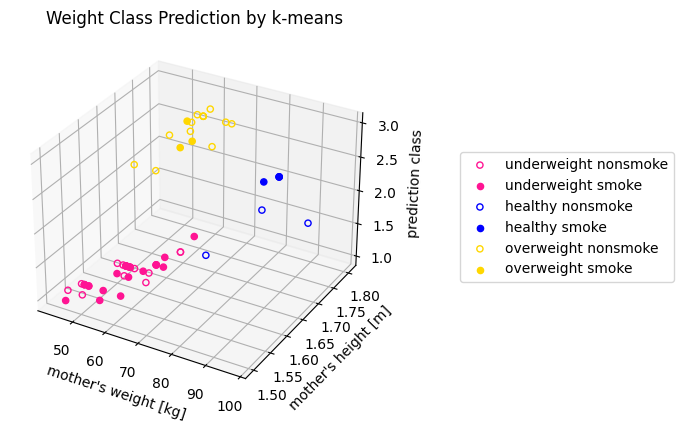

In [ ]:
# display prediction of k-means
temp = X_test.assign(predictions=cluster_labels_test)
nonsmoke_data = X_test[X_test['smoke'] == 0].reset_index(drop=True)
smoke_data = X_test[X_test['smoke'] == 1].reset_index(drop=True)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for underweight cluster (Cluster 1) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 1)], temp.height[(temp.smoke == 0) & (temp.predictions == 1)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 1)], label='underweight nonsmoke', marker='o', facecolors='none', edgecolors='deeppink',alpha = 1)

# Scatter plot for underweight cluster (Cluster 1) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 1)], temp.height[(temp.smoke == 1) & (temp.predictions == 1)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 1)], c='deeppink', label='underweight smoke', marker='o', alpha = 1)

# Scatter plot for healthy weight cluster (Cluster 2) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 2)], temp.height[(temp.smoke == 0) & (temp.predictions == 2)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 2)], label='healthy nonsmoke', marker='o', facecolors='none', edgecolors='blue',alpha = 1)

# Scatter plot for healthy weight cluster (Cluster 2) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 2)], temp.height[(temp.smoke == 1) & (temp.predictions == 2)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 2)], c='blue', label='healthy smoke', marker='o',alpha = 1)

# Scatter plot for overweight cluster (Cluster 3) - nonsmoke
ax.scatter3D(temp.weight[(temp.smoke == 0) & (temp.predictions == 3)], temp.height[(temp.smoke == 0) & (temp.predictions == 3)], temp.predictions[(temp.smoke == 0) & (temp.predictions == 3)], label='overweight nonsmoke', marker='o', facecolors='none', edgecolors='gold',alpha = 1)

# Scatter plot for overweight cluster (Cluster 3) - smoke
ax.scatter3D(temp.weight[(temp.smoke == 1) & (temp.predictions == 3)], temp.height[(temp.smoke == 1) & (temp.predictions == 3)], temp.predictions[(temp.smoke == 1) & (temp.predictions == 3)], c='gold', label='overweight smoke', marker='o',alpha = 1)

# Set axis labels and title
ax.set_xlabel("mother's weight [kg]")
ax.set_ylabel("mother's height [m]")
ax.set_zlabel('prediction class')
ax.set_title('Weight Class Prediction by k-means')

ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()
